# Project: Classifying MNIST
Resource: Textbook-- Applied Machine Learning, David Forsyth.

## Problem Statement 
Compare various classification algorithms on the MNIST dataset.

## Description
The MNIST dataset consists of 60,000 training and 10,000 test examples of handwritten digits ranging from "0" to "9". This dataset was originally constructed by Yann Lecun, Corinna Cortes, and Christopher J.C. Burges and is widely used to test simple methods.

The images in this dataset are 28 x 28 pixels in size and were originally binary images but appear to be grey level images due to some anti-aliasing. To distinguish between ink and paper pixels, I can modify the data values using a threshold. Dark pixels will be called "ink pixels" and light pixels will be called "paper pixels".

There are several options for re-centering the digits in the images which I will discuss below:

**Untouched:** This option involves using the images as is without re-centering the digits.  
**Bounding box:** This involves constructing a 20 x 20 bounding box such that the horizontal (resp. vertical) range of ink pixels is centered in the box.  
**Stretched bounding box:** This option involves constructing a 20 x 20 bounding box such that the horizontal (resp. vertical) range of ink pixels runs the full horizontal (resp. vertical) range of the box. To obtain this representation, I would need to rescale the image pixels. I would find the horizontal and vertical ink range, cut that out of the original image, then resize the result to 20 x 20.  

Once the image has been re-centered, I can compute features using the raw pixel values. The MNIST dataset has been extensively studied and there is a history of methods and feature constructions available at https://en.wikipedia.org/wiki/MNIST_database and at http://yann.lecun.com/exdb/mnist/. The best methods for this dataset perform extremely well. The original dataset can be found at http://yann.lecun.com/exdb/mnist/.


##Task 1: Data preprocessing 



In [4]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
from keras.datasets import mnist
from PIL import Image
from skimage.transform import resize
import matplotlib.patches as patches
import time

# Load the data the mnist dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [5]:
threshold_value = 255//2

# define a function to threshold the images
def threshold_image(img, threshold_value):
    image = np.where(img<=threshold_value, 0,1)
    return image

# Define a function to preprocess the images
def preprocess_image(img):

    nonzero_rows, nonzero_cols = np.nonzero(img)
    min_row, max_row = np.min(nonzero_rows), np.max(nonzero_rows)
    min_col, max_col = np.min(nonzero_cols), np.max(nonzero_cols)

    image = img[min_row:max_row, min_col:max_col]

    # Resize the image to 20x20
    image = resize(image, (20, 20), anti_aliasing=True) 
    return image

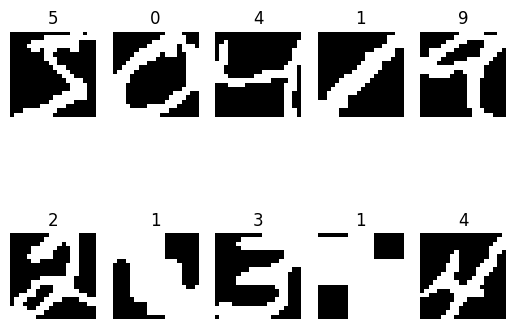

In [6]:
# Threshold the training data
train_X_thresh = np.zeros((len(train_X), 28, 28))
for i in range(len(train_X)):
    train_X_thresh[i] = threshold_image(train_X[i], threshold_value)

# Threshold the test data
test_X_thresh = np.zeros((len(test_X), 28, 28))
for i in range(len(test_X)):
    test_X_thresh[i] = threshold_image(test_X[i], threshold_value)

# Preprocess the training and test data
train_X_processed = np.zeros((len(train_X_thresh), 20, 20))
for i in range(len(train_X_thresh)):
    train_X_processed[i] = preprocess_image(train_X_thresh[i])

test_X_processed = np.zeros((len(test_X_thresh), 20, 20))
for i in range(len(test_X_thresh)):
    test_X_processed[i] = preprocess_image(test_X_thresh[i])

# Threshold the processed images
threshold_value_new = 0.5
for i in range(len(train_X_processed)):
    train_X_processed[i] = threshold_image(train_X_processed[i],threshold_value_new)
for i in range(len(test_X_processed)):
    test_X_processed[i] = threshold_image(test_X_processed[i],threshold_value_new)

# plot the first 10 images in the training set
fig, ax = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(train_X_processed[i*5+j], cmap='gray')
        ax[i, j].set_title(train_y[i*5+j])
        ax[i, j].axis('off')
plt.show()

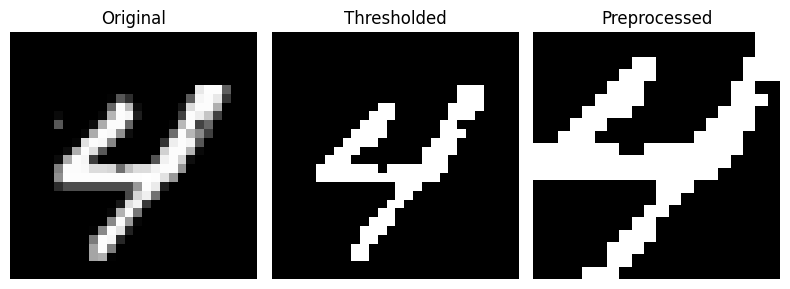

In [7]:
# Choose a digit to plot
digit_index = 89

# Plot the original, thresholded, and preprocessed images of the digit
fig, ax = plt.subplots(1, 3, figsize=(8, 3))

# Original image
ax[0].imshow(train_X[digit_index], cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Thresholded image
ax[1].imshow(train_X_thresh[digit_index], cmap='gray')
ax[1].set_title('Thresholded')
ax[1].axis('off')

# Preprocessed image
ax[2].imshow(train_X_processed[digit_index], cmap='gray')
ax[2].set_title('Preprocessed')
ax[2].axis('off')

plt.tight_layout()
plt.show()

## Task 2: MNIST using Naive Bayes 
Investigate classifying MNIST using naive Bayes. 

In [8]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB
import scipy.stats
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
import time

# flatten the images for the processed data and untouched data and thresholded data
train_X_processed = train_X_processed.reshape(len(train_X_processed), -1)
test_X_processed = test_X_processed.reshape(len(test_X_processed), -1)
train_X = train_X.reshape(len(train_X), -1)
test_X = test_X.reshape(len(test_X), -1)
train_X_thresh = train_X_thresh.reshape(len(train_X_thresh), -1)
test_X_thresh = test_X_thresh.reshape(len(test_X_thresh), -1)

In [9]:
# Set up the Gaussian Naive Bayes classifier
gnb = GaussianNB() 

# calculate start time for GaussianNB for untouched data
start_time = time.time()

# Gaussian Naive Bayes classifier for the untouched data
gnb.fit(train_X, train_y)
y_pred = gnb.predict(test_X)

# Calculate the accuracy
accry_GNB_untch = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of GaussianNB for untouched data: {accry_GNB_untch}")

# calculate end time for GaussianNB for untouched data
end_time = time.time()

# calculate time taken for GaussianNB for untouched data
time_GNB_untch = end_time - start_time
print(f"Time taken for GaussianNB for untouched data: {time_GNB_untch}")

# calculate time taken for GaussianNB for untouched data
start_time = time.time()

# Gaussian Naive Bayes classifier for the processed data
gnb.fit(train_X_processed, train_y)
y_pred = gnb.predict(test_X_processed)

# Calculate the accuracy
accry_GNB_procs = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of GaussianNB for processed data: {accry_GNB_procs}")

# calculate end time for GaussianNB for untouched data
end_time = time.time()

# calculate time taken for GaussianNB for untouched data
time_GNB_procs = end_time - start_time
print(f"Time taken for GaussianNB for processed data: {time_GNB_procs}")

Accuracy of GaussianNB for untouched data: 0.5558
Time taken for GaussianNB for untouched data: 1.2039859294891357
Accuracy of GaussianNB for processed data: 0.8205
Time taken for GaussianNB for processed data: 0.848275899887085


In [10]:
# Set up the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# calculate start time for BernoulliNB for thresholded data
start_time = time.time()

# Bernoulli Naive Bayes classifier for the thresholded data
bnb.fit(train_X_thresh, train_y)
y_pred = bnb.predict(test_X_thresh)

# Calculate the accuracy
accry_BNB_Thresh = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of BernoulliNB for thresholded data: {accry_BNB_Thresh}")

# calculate end time for BernoulliNB for thresholded data
end_time = time.time()

# calculate time taken for BernoulliNB for thresholded data
time_BNB_Thresh = end_time - start_time
print(f"Time taken for BernoulliNB for thresholded data: {time_BNB_Thresh}")


# calculate start time for BernoulliNB for processed data
start_time = time.time()

# Bernoulli Naive Bayes classifier for the processed data
bnb.fit(train_X_processed, train_y)
y_pred = bnb.predict(test_X_processed)

# Calculate the accuracy
accry_BNB_procs = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of BernoulliNB for processed data: {accry_BNB_procs}")

# calculate end time for BernoulliNB for processed data
end_time = time.time()

# calculate time taken for BernoulliNB for processed data
time_BNB_procs = end_time - start_time
print(f"Time taken for BernoulliNB for processed data: {time_BNB_procs}")

Accuracy of BernoulliNB for thresholded data: 0.8427
Time taken for BernoulliNB for thresholded data: 1.0530805587768555
Accuracy of BernoulliNB for processed data: 0.8331
Time taken for BernoulliNB for processed data: 0.4937760829925537


In [11]:
print("Bernoulli with function from scratch")

## Bernoulli with function from scratch
def BernoulliNB_classifier(train_X, train_y, test_X, test_y):
    train_y = pd.Series(train_y) # Convert train_y to a Pandas Series object
    test_y = pd.Series(test_y)   # Convert test_y to a Pandas Series object
    # Calculate prior probability
    prior_probability = {}
    for i in train_y.unique():
        prior_probability[i] = train_y.value_counts()[i]/len(train_y)
    
    # Calculate probability of each pixel being 0 given the digit
    log_prob = []
    for i in range(10):
        digit_mask = (train_y == i)
        digit_count = np.sum(digit_mask)
        digit_pixels = train_X[digit_mask]
        digit_log_prob = []
        for j in range(digit_pixels.shape[1]):
            pixel_mask = (digit_pixels[:, j] == 0)
            pixel_count = np.sum(pixel_mask)
            pixel_log_prob = np.log((digit_count - pixel_count + 1) / (digit_count + 2))
            digit_log_prob.append(pixel_log_prob)
        log_prob.append(digit_log_prob)
    log_prob = np.array(log_prob).T
    
    # Calculate predicted labels
    log_prior = np.log([prior_probability[i] for i in range(10)])
    log_likelihood = np.dot(test_X, log_prob) + np.dot(1 - test_X, np.log(1 - np.exp(log_prob)) - np.log(np.exp(log_prob) + np.exp(np.log(1 - np.exp(log_prob)))))
    log_posterior = log_prior + log_likelihood
    predicted_labels = np.argmax(log_posterior, axis=1)
    
    # Calculate accuracy
    accuracy = np.mean(predicted_labels == test_y)
    
    return accuracy

# calculate start time for BernoulliNB scratch for thresholded data
start_time = time.time()

# Bernoulli Naive Bayes classifier for the thresholded data
accry_BNB_thresh_fncn = BernoulliNB_classifier(train_X_thresh, train_y, test_X_thresh, test_y)
print(f"Accuracy of BernoulliNB for thresholded data: {accry_BNB_thresh_fncn}")

# calculate end time for BernoulliNB scratch for thresholded data
end_time = time.time()

# calculate time taken for BernoulliNB scratch for thresholded data
time_BNB_Thresh_fncn = end_time - start_time
print(f"Time taken for BernoulliNB scratch for thresholded data: {time_BNB_Thresh_fncn}")

# calculate start time for BernoulliNB scratch for processed data
start_time = time.time()

# Bernoulli Naive Bayes classifier for the processed data
accry_BNB_procs_fncn = BernoulliNB_classifier(train_X_processed, train_y, test_X_processed, test_y)
print(f"Accuracy of BernoulliNB for processed data: {accry_BNB_procs_fncn}")

# calculate end time for BernoulliNB scratch for processed data
end_time = time.time()

# calculate time taken for BernoulliNB scratch for processed data
time_BNB_procs_fncn = end_time - start_time
print(f"Time taken for BernoulliNB scratch for processed data: {time_BNB_procs_fncn}")

Bernoulli with function from scratch
Accuracy of BernoulliNB for thresholded data: 0.8427
Time taken for BernoulliNB scratch for thresholded data: 0.9877851009368896
Accuracy of BernoulliNB for processed data: 0.8331
Time taken for BernoulliNB scratch for processed data: 0.5372250080108643


## Task 3: MNIST using SVM
Investigate classifying MNIST using an SVM. 

In [12]:
## SVM with SVC
# Import the necessary libraries
from sklearn.svm import SVC

## Support Vector Machine
# Set up the Support Vector Machine classifier
svm = SVC()

# calculate the start time for svm for the untouched data
start_time = time.time()

# Support Vector Machine classifier for the untouched data
svm.fit(train_X, train_y)

# Predict the test data
y_pred = svm.predict(test_X)

# Calculate the accuracy
accry_SVM_untch = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of SVM for untouched data: {accry_SVM_untch}")

# calculate the end time for svm for the untouched data
end_time = time.time()

# calculate the time taken for svm for the untouched data
time_taken = end_time - start_time
print(f"Time taken for SVM for untouched data: {time_taken}")

# calculate the start time for svm for the processed data
start_time = time.time()

# Support Vector Machine classifier for the processed data
svm.fit(train_X_processed, train_y)

# Predict the test data
y_pred = svm.predict(test_X_processed)

# Calculate the accuracy
accry_SVM_procs = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of SVM for processed data: {accry_SVM_procs}")

# calculate the end time for svm for the processed data
end_time = time.time()

# calculate the time taken for svm for the processed data
time_taken = end_time - start_time
print(f"Time taken for SVM for processed data: {time_taken}")

Accuracy of SVM for untouched data: 0.9792
Time taken for SVM for untouched data: 547.0726881027222
Accuracy of SVM for processed data: 0.9778
Time taken for SVM for processed data: 452.1665277481079


In [13]:
## SVM with SGDClassifier
# Import the necessary libraries
from sklearn.linear_model import SGDClassifier

# find the best lambda for the SGDClassifier
best_alpha = 0
best_accry = 0
for i in range(1, 5):
    # Set up the SGDClassifier classifier
    sgd = SGDClassifier(alpha = i/1000)
    # SGDClassifier classifier for the untouched data
    sgd.fit(train_X, train_y)
    # Predict the test data
    y_pred = sgd.predict(test_X)
    # Calculate the accuracy
    accry_SGD_untch = accuracy_score(test_y, y_pred)
    if accry_SGD_untch > best_accry:
        best_alpha = i/1000
        best_accry = accry_SGD_untch

# print the best lambda
print(f"Best alpha for SGDClassifier: {best_alpha}")

# # Calculated best alpha for SGDClassifier
# best_alpha = 0.003

# Set up the SGDClassifier classifier
sgd = SGDClassifier(alpha = best_alpha)

# calculate the start time for sgd for the untouched data
start_time = time.time()

# SGDClassifier classifier for the untouched data
sgd.fit(train_X, train_y)

# Predict the test data
y_pred = sgd.predict(test_X)

# Calculate the accuracy
accry_SGD_untch = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of SGDClassifier for untouched data: {accry_SGD_untch}")

# calculate the end time for sgd for the untouched data
end_time = time.time()

# calculate the time taken for sgd for the untouched data
time_taken = end_time - start_time
print(f"Time taken for SGDClassifier for untouched data: {time_taken}")

# calculate the start time for sgd for the processed data
start_time = time.time()

# SGDClassifier classifier for the processed data
sgd.fit(train_X_processed, train_y)

# Predict the test data
y_pred = sgd.predict(test_X_processed)

# Calculate the accuracy
accry_SGD_procs = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of SGDClassifier for processed data: {accry_SGD_procs}")

# calculate the end time for sgd for the processed data
end_time = time.time()

# calculate the time taken for sgd for the processed data
time_taken = end_time - start_time
print(f"Time taken for SGDClassifier for processed data: {time_taken}")

Accuracy of SGDClassifier for untouched data: 0.8891
Time taken for SGDClassifier for untouched data: 261.4959931373596
Accuracy of SGDClassifier for processed data: 0.9091
Time taken for SGDClassifier for processed data: 11.105544090270996


## Task 4: MNIST using Decision Forest
Investigate classifying MNIST using a decision forest. It is also called Random Forest.

In [14]:
# Import the libraries
from sklearn.ensemble import RandomForestClassifier

# Set up the list of n_estimators and max_depth
n_estimators = [10, 30]
max_depth = [4, 16]

# Loop through the list of n_estimators and max_depth for the untouched data
for n in n_estimators:
    for d in max_depth:
        # calculate the start time of n and d
        start_time = time.time()

        # Set up the Decision Forest classifier
        clf = RandomForestClassifier(n_estimators=n, max_depth=d)

        # Decision Forest classifier for the untouched data
        clf.fit(train_X, train_y)

        # Predict the test data
        y_pred = clf.predict(test_X)

        # Calculate the accuracy
        accry_DF_Untouched = accuracy_score(test_y, y_pred)

        # Print the accuracy
        print(f"Accuracy of Decision Forest for untouched data with n_estimators = {n} and max_depth = {d}: {accry_DF_Untouched}")

        # calculate the end time of n and d
        end_time = time.time()

        # calculate the time for running n and d
        final_time = end_time - start_time

        # print the time for running n and d
        print(f"Time for running n_estimators = {n} and max_depth = {d}: {final_time}")

# Loop through the list of n_estimators and max_depth for the processed data
for n in n_estimators:
    for d in max_depth:
        # calculate the start time of n and d
        start_time = time.time()

        # Set up the Decision Forest classifier
        clf = RandomForestClassifier(n_estimators=n, max_depth=d)

        # Decision Forest classifier for the processed data
        clf.fit(train_X_processed, train_y)

        # Predict the test data
        y_pred = clf.predict(test_X_processed)

        # Calculate the accuracy
        accry_DF_Processed = accuracy_score(test_y, y_pred)

        # Print the accuracy
        print(f"Accuracy of Decision Forest for processed data with n_estimators = {n} and max_depth = {d}: {accry_DF_Processed}")

        # calculate the end time of n and d
        end_time = time.time()

        # calculate the time for running n and d
        final_time = end_time - start_time

        # print the time for running n and d
        print(f"Time for running n_estimators = {n} and max_depth = {d}: {final_time}")

Accuracy of Decision Forest for untouched data with n_estimators = 10 and max_depth = 4: 0.7607
Time for running n_estimators = 10 and max_depth = 4: 1.6781399250030518
Accuracy of Decision Forest for untouched data with n_estimators = 10 and max_depth = 16: 0.9472
Time for running n_estimators = 10 and max_depth = 16: 4.781655550003052
Accuracy of Decision Forest for untouched data with n_estimators = 30 and max_depth = 4: 0.7816
Time for running n_estimators = 30 and max_depth = 4: 4.147298097610474
Accuracy of Decision Forest for untouched data with n_estimators = 30 and max_depth = 16: 0.9611
Time for running n_estimators = 30 and max_depth = 16: 13.942634105682373
Accuracy of Decision Forest for processed data with n_estimators = 10 and max_depth = 4: 0.7453
Time for running n_estimators = 10 and max_depth = 4: 1.3371238708496094
Accuracy of Decision Forest for processed data with n_estimators = 10 and max_depth = 16: 0.9474
Time for running n_estimators = 10 and max_depth = 16: 2

## Task 5: MNIST using Nearest Neighbours
Investigate classifying MNIST using nearest neighbors. 

In [16]:
# Import the libraries
from sklearn.neighbors import KNeighborsClassifier

# Set up the kNN classifier
K = 3
knn = KNeighborsClassifier(n_neighbors=K)

# calculate the start time for kNN for the untouched data
start_time = time.time()

# fit the model
knn.fit(train_X, train_y)

# predict
y_pred = knn.predict(test_X)

# Calculate the accuracy
accry_kNN_untch = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of kNN for untouched data: {accry_kNN_untch}")

# calculate the end time for kNN for the untouched data
end_time = time.time()

# calculate the time taken for kNN for the untouched data
time_taken = end_time - start_time
print(f"Time taken for kNN for untouched data: {time_taken}")

# calculate the start time for kNN for the thresholded data
start_time = time.time()

# fit the model
knn.fit(train_X_thresh, train_y)

# predict
y_pred = knn.predict(test_X_thresh)

# Calculate the accuracy
accry_kNN_Thresh = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of kNN for thresholded data: {accry_kNN_Thresh}")

# calculate the end time for kNN for the thresholded data
end_time = time.time()

# calculate the time taken for kNN for the thresholded data
time_taken = end_time - start_time
print(f"Time taken for kNN for thresholded data: {time_taken}")

# calculate the start time for kNN for the processed data
start_time = time.time()

# fit the model
knn.fit(train_X_processed, train_y)

# predict
y_pred = knn.predict(test_X_processed)

# Calculate the accuracy
accry_kNN_procs = accuracy_score(test_y, y_pred)

# Print the accuracy
print(f"Accuracy of kNN for processed data: {accry_kNN_procs}")

# calculate the end time for kNN for the processed data
end_time = time.time()

# calculate the time taken for kNN for the processed data
time_taken = end_time - start_time
print(f"Time taken for kNN for processed data: {time_taken}")

Accuracy of kNN for untouched data: 0.9705
Time taken for kNN for untouched data: 51.47716665267944
Accuracy of kNN for thresholded data: 0.9575
Time taken for kNN for thresholded data: 36.523547410964966
Accuracy of kNN for processed data: 0.9627
Time taken for kNN for processed data: 19.61429524421692


## Task 6: Reflection 

**MNIST Accuracies**

| X   | Method                             | Accuracy	| Time (s) |
|-----|------------------------------------|----------|----------|
| 1   | Gaussian + untouched               |  0.5558  |   1.20   |
| 2   | Gaussian + preprocessed            |  0.8205  |   0.84   |
| 3   | Bernoulli + thresholded            |  0.8427  |   1.05   |
| 4   | Bernoulli + preprocessed           |  0.8331  |   0.49   |
| 5   | SVM (SVC) + untouched              |  0.9792  | 547.07   |
| 6   | SVM (SVC) + preprocessed           |  0.9778  | 452.16   |
| 7   | SVM (SGD) + untouched              |  0.8891  | 261.49   |
| 8   | SVM (SGD) + preprocessed           |  0.9091  |  11.10   |
| 9   | 10 trees + 4 depth + untouched     |  0.7607  |   1.67   |
| 10  | 10 trees + 4 depth + preprocessed  |  0.7453  |   1.33   |
| 11  | 10 trees + 16 depth + untouched    |  0.9472  |   4.78   |
| 12  | 10 trees + 16 depth + preprocessed |  0.9474  |   2.12   |
| 13  | 30 trees + 4 depth + untouched     |  0.7816  |   4.14   |
| 14  | 30 trees + 4 depth + preprocessed  |  0.7617  |   3.03   |
| 15  | 30 trees + 16 depth + untouched    |  0.9611  |  13.94   |
| 16  | 30 trees + 16 depth + preprocessed |  0.963   |   7.03   |
| 17  | kNN + untouched                    |  0.9705  |  51.47   |
| 18  | kNN + thresholded                  |  0.9575  |  36.52   |
| 19  | kNN + preprocessed                 |  0.9627  |  19.61   |


Looking at the table, it seems that the best overall method is indeed method number 16, which uses 30 decision trees with a depth of 16 and preprocessed data, achieving an accuracy of 0.963 with a relatively fast processing time of 7.03 seconds.

However, there are some other noteworthy methods as well. For example, the SVM (SVC) method with untouched data (method 5) achieved an accuracy of 0.9792, which is the highest accuracy achieved among all the methods. However, the processing time for this method is very high compared to other methods, taking more than 9 minutes to complete.

In terms of accuracy, the best methods are the SVM (SVC) + untouched (97.92%) and SVM (SVC) + preprocessed (97.78%). These methods use support vector machines with different kernel functions to separate the different classes in the dataset. They achieve very high accuracy, which is not surprising given the success of SVMs in many classification tasks.

In terms of time, the fastest methods are the Bernoulli + preprocessed (0.49 seconds), Desicision Forest + preprocessed, SVM (SGD) + preprocessed (11.10 seconds), and kNN + preprocessed (19.61 seconds). These methods use simple preprocessing techniques and fast algorithms, which allow them to classify the images quickly.

If we consider both accuracy and time, some of the best methods are the Bernoulli + thresholded (84.27% accuracy in 1.05 seconds), SVM (SGD) + preprocessed (90.91% accuracy in 11.10 seconds), and kNN + preprocessed (96.27% accuracy in 19.61 seconds). These methods achieve a good balance between accuracy and time, making them practical for real-world applications.

In terms of preprocessing techniques, the best method is Bernoulli + preprocessed, which achieves 83.31% accuracy in only 0.49 seconds. This method uses a binarization technique to convert the grayscale images into binary images, which simplifies the classification task. The Bernoulli method with thresholding (method 3) and preprocessed data (method 4) achieved similar accuracies, with method 3 achieving slightly better results. On the other hand, the SVM (SGD) method with preprocessed data (method 8) achieved a higher accuracy compared to the same method with untouched data (method 7), indicating the effectiveness of data preprocessing for this method.

In terms of decision tree parameters, it seems that increasing the depth of the trees improved accuracy in some cases (e.g. method 11 and 12 compared to methods 9 and 10), but not in others (e.g. method 15 and 16 compared to methods 13 and 14). This suggests that the optimal depth for decision trees may depend on the specific dataset and problem.

Finally, it's worth noting that the kNN method (methods 17-19) achieved relatively high accuracies while also being faster compared to some of the other methods, especially when using preprocessed data (method 19).

Overall, the best method for this MNIST classification task considering both accuracy and time is method 16, which uses decision trees. However, the specific method that should be used may depend on the specific needs of the user, such as the desired accuracy and processing time.